# Mixture CDF Flow


## Setup


In [1]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim

from models.mixture_cdf_flow import MixtureCDFFlow
from utils.data import load_1d_flow_data
from utils.plotting import plot_losses, visualize_model_progression
from utils.training_and_evaluation import train


In [2]:
SEED = 3
np.random.seed(SEED)
torch.manual_seed(SEED)

plt.style.use('ggplot')

## Load Data


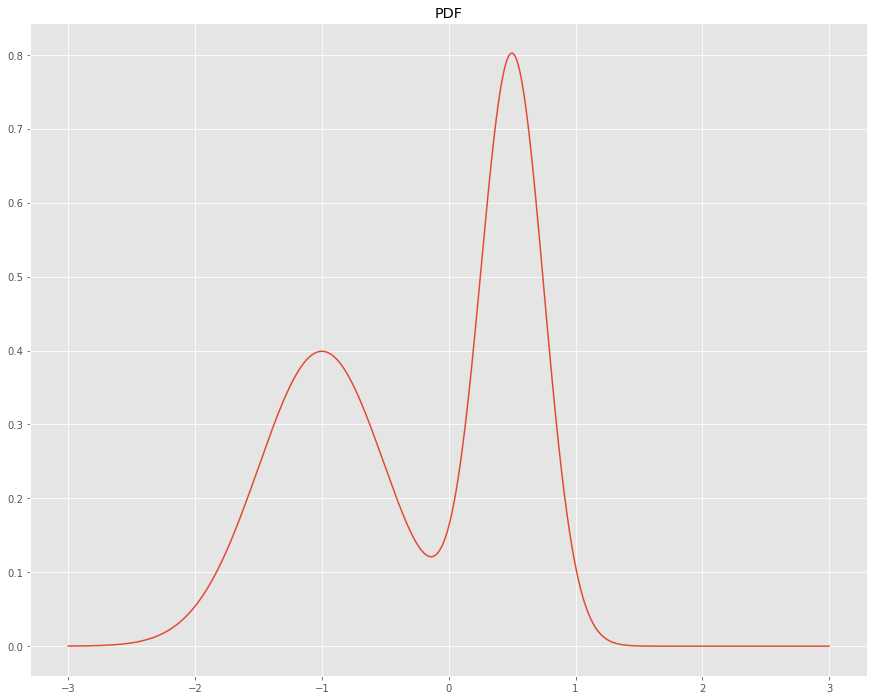

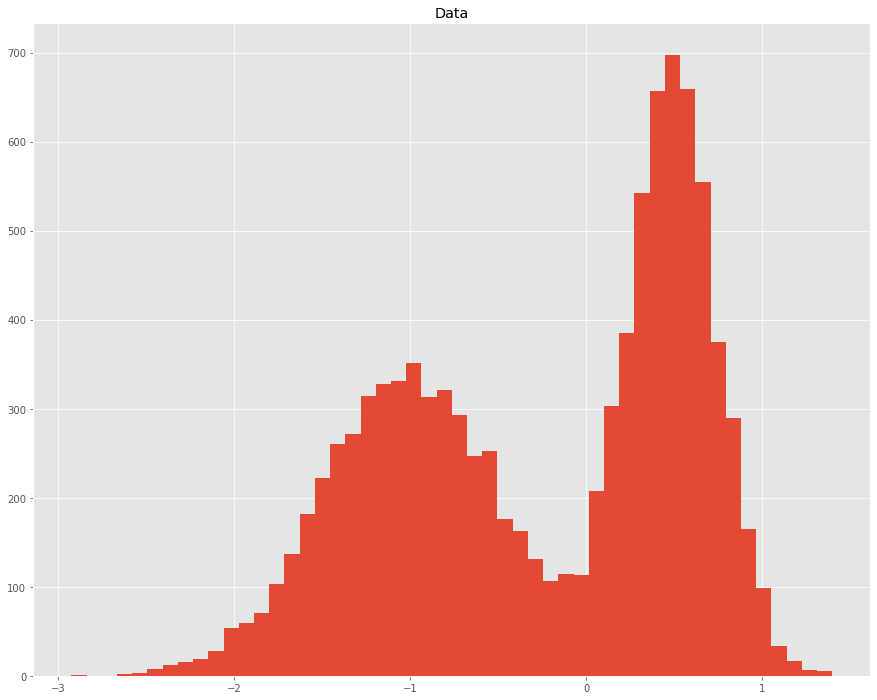

In [3]:
GAUSSIAN_PARAMS = [(-1, 0.5), (0.5, 0.25)]
LOADER_ARGS = dict(batch_size=128, shuffle=True)

train_dataloader, test_dataloader = load_1d_flow_data(
    gaussian_params=GAUSSIAN_PARAMS,
    loader_args=LOADER_ARGS)

## Training and Evaluation with Uniform Base Distribution

In [4]:
uniform_model = MixtureCDFFlow(num_components=5)

### Training

In [5]:
LEARNING_RATE = 5e-3

optimizer = optim.Adam(uniform_model.parameters(), lr=LEARNING_RATE)

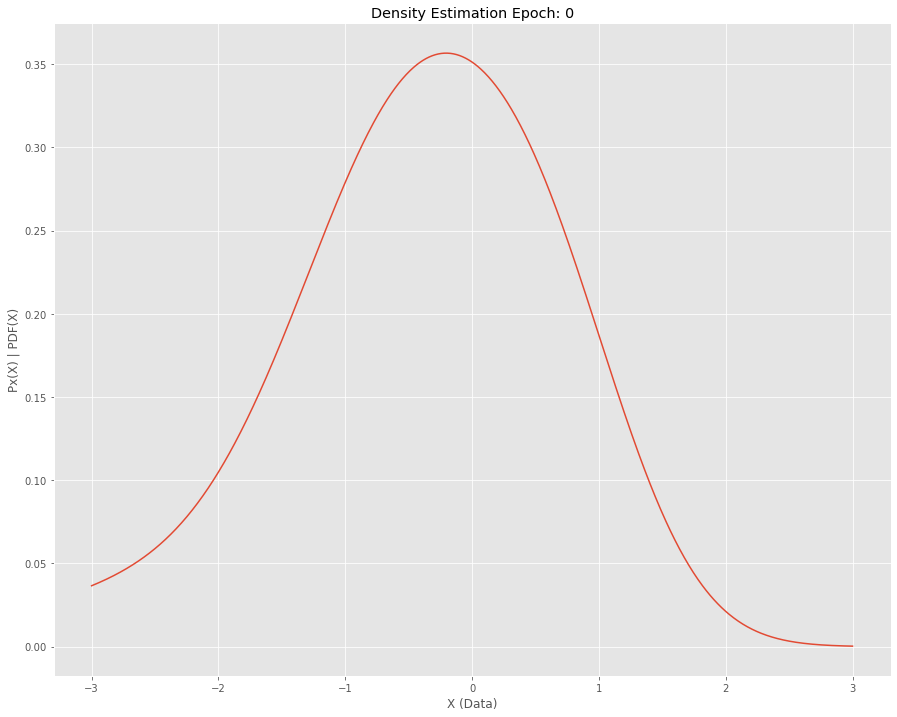

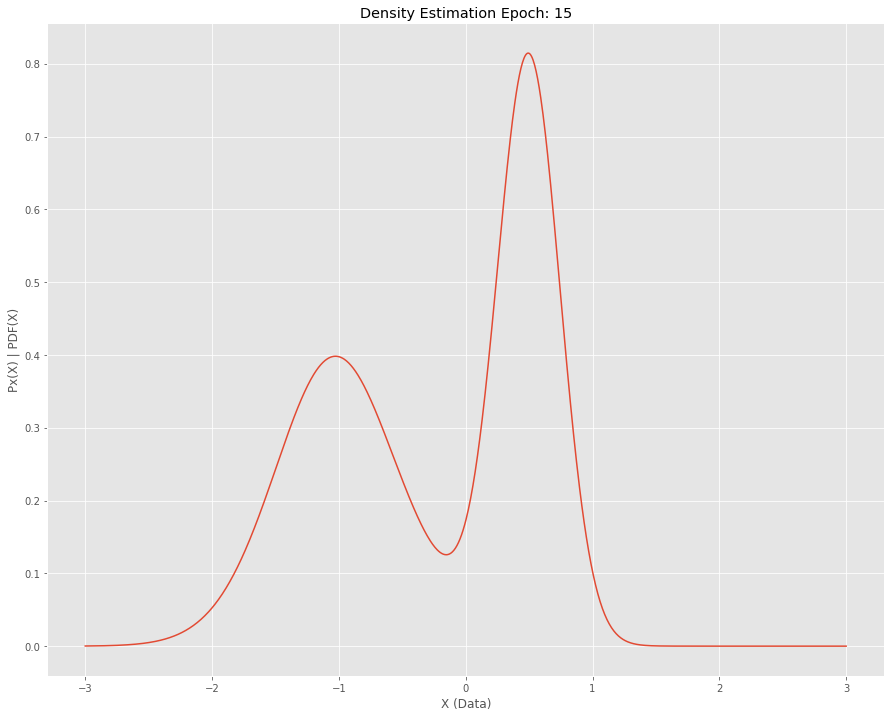

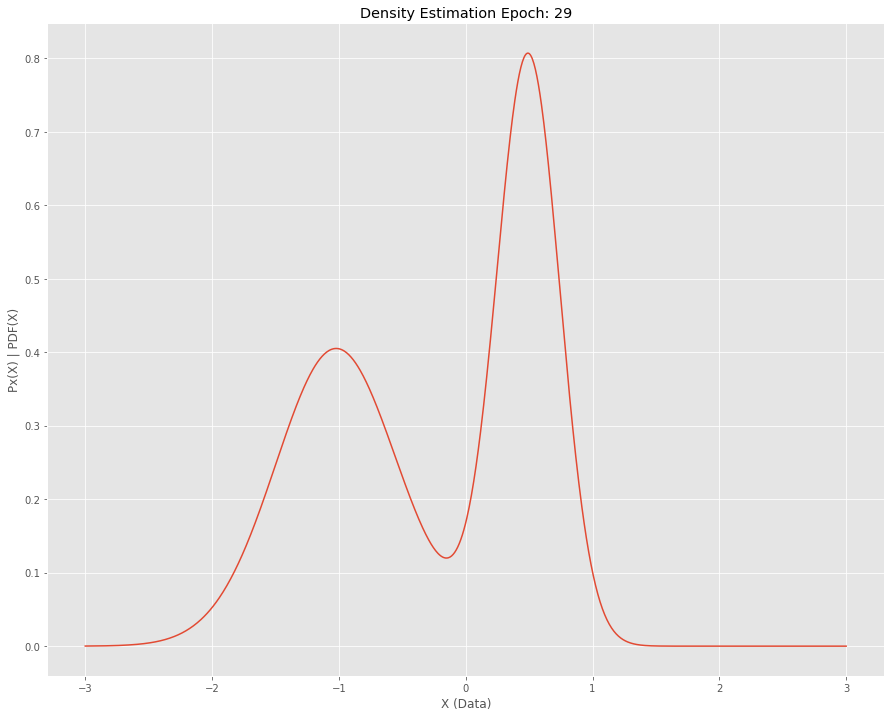

In [6]:
EPOCHS = 30
uniform_model_copy = copy.deepcopy(uniform_model)
train_losses, eval_losses = train(uniform_model,
                                  train_dataloader,
                                  test_dataloader,
                                  optimizer,
                                  epochs=EPOCHS)

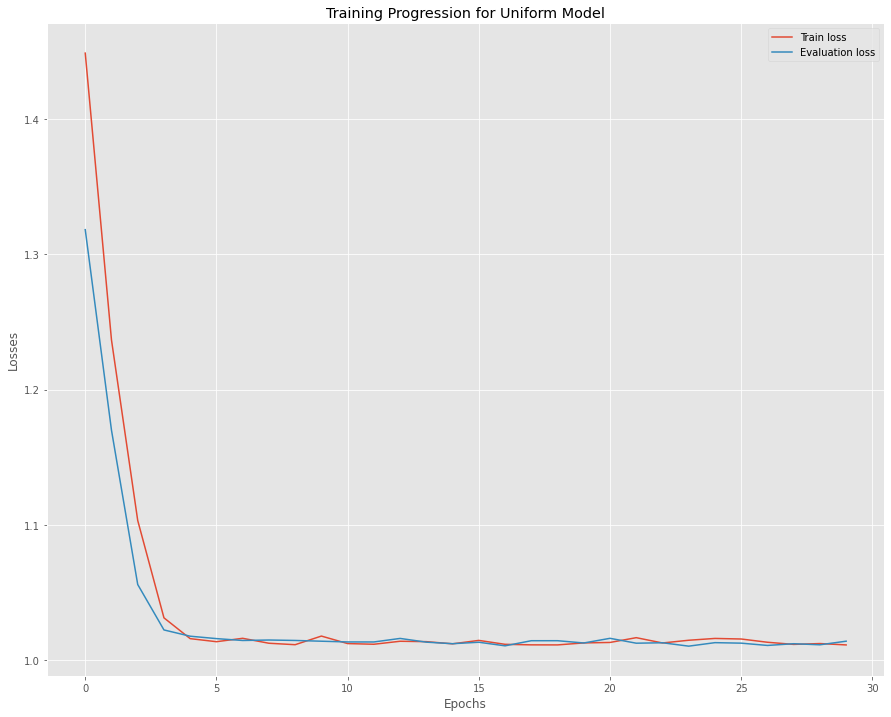

In [7]:
_ = plot_losses(train_losses, eval_losses, 'Training Progression for Uniform Model')

### Evaluation

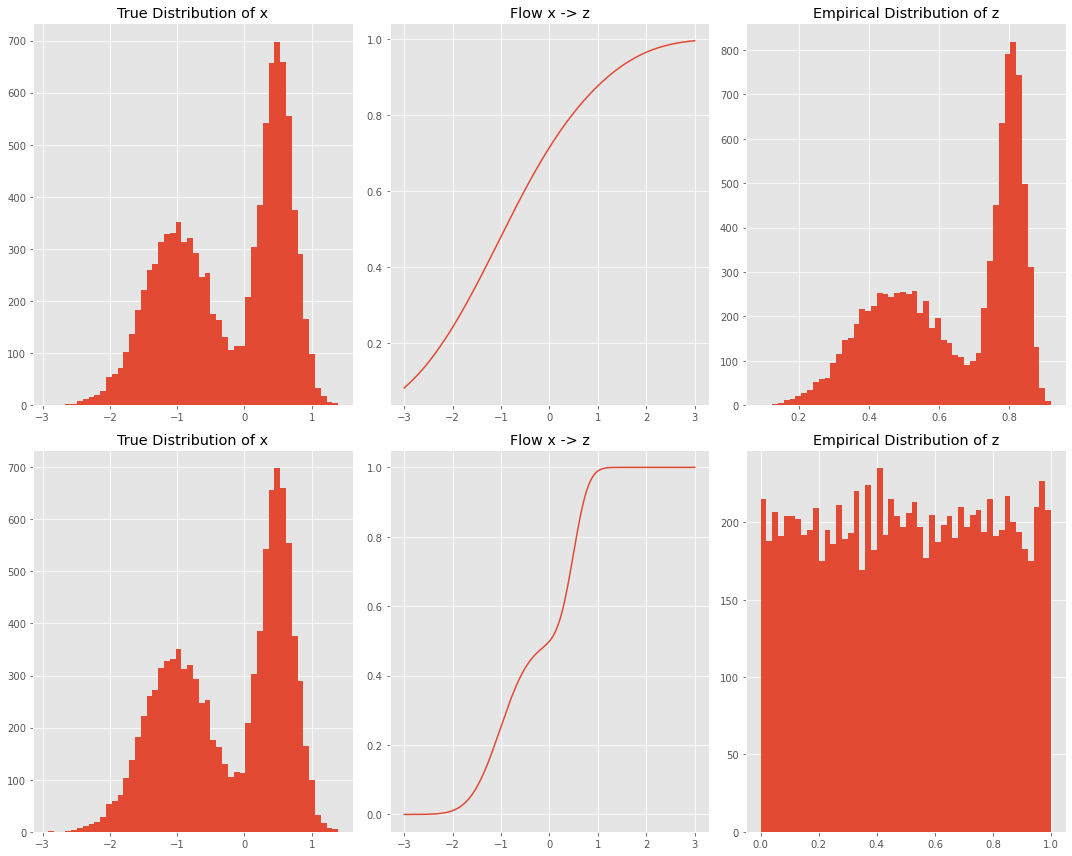

In [8]:

_ = visualize_model_progression(train_dataloader,
                            trained_model=uniform_model,
                            untrained_model=uniform_model_copy)

## Training and Evaluation with Beta(5, 5) Base Distribution.

In [9]:
beta_model = MixtureCDFFlow(base_dist='beta', num_components=5)

### Training

In [10]:
LEARNING_RATE = 1e-2

optimizer = optim.Adam(beta_model.parameters(), lr=LEARNING_RATE)

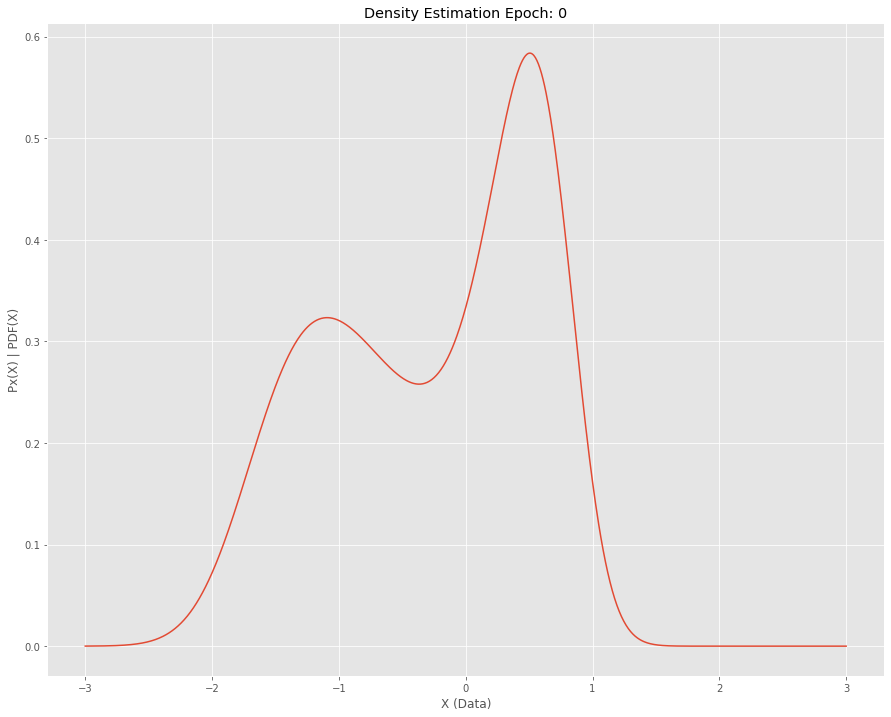

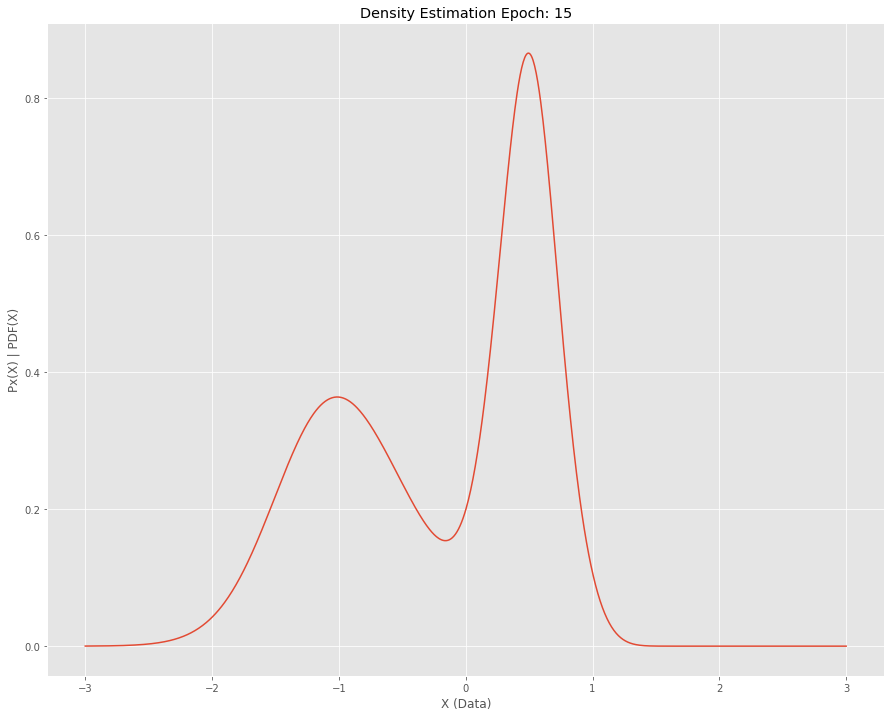

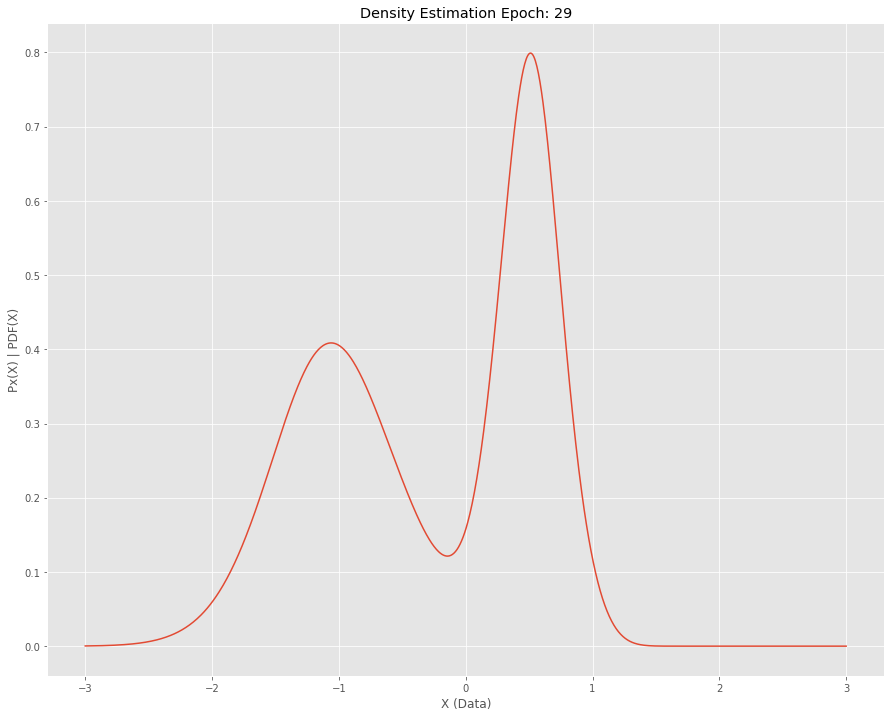

In [11]:
EPOCHS = 30
beta_model_copy = copy.deepcopy(beta_model)
train_losses, eval_losses = train(beta_model,
                                  train_dataloader,
                                  test_dataloader,
                                  optimizer,
                                  epochs=EPOCHS)

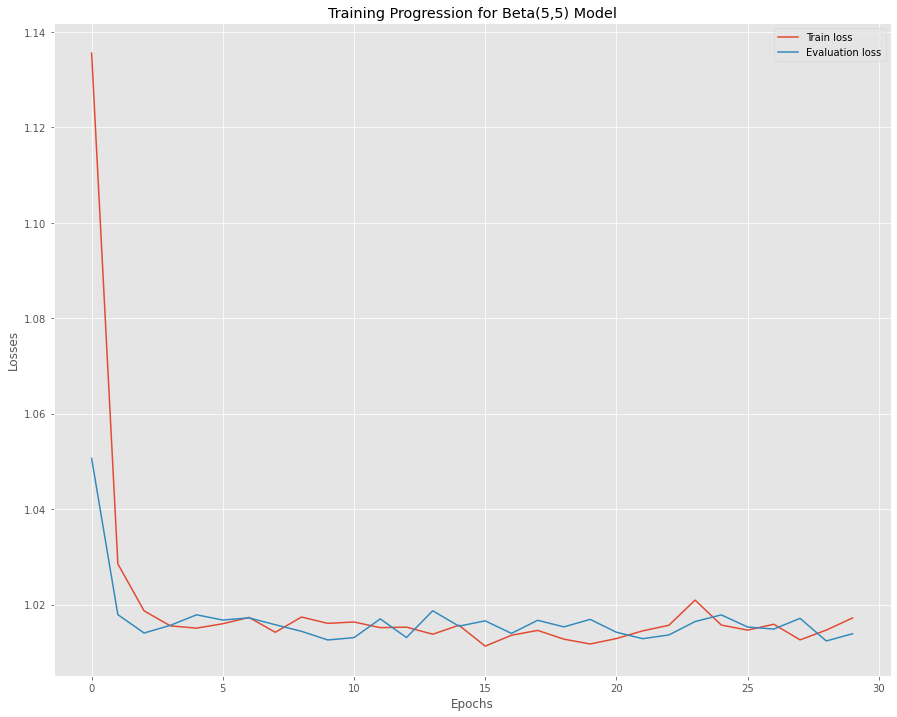

In [12]:
_ = plot_losses(train_losses, eval_losses, 'Training Progression for Beta(5,5) Model')

### Evaluation

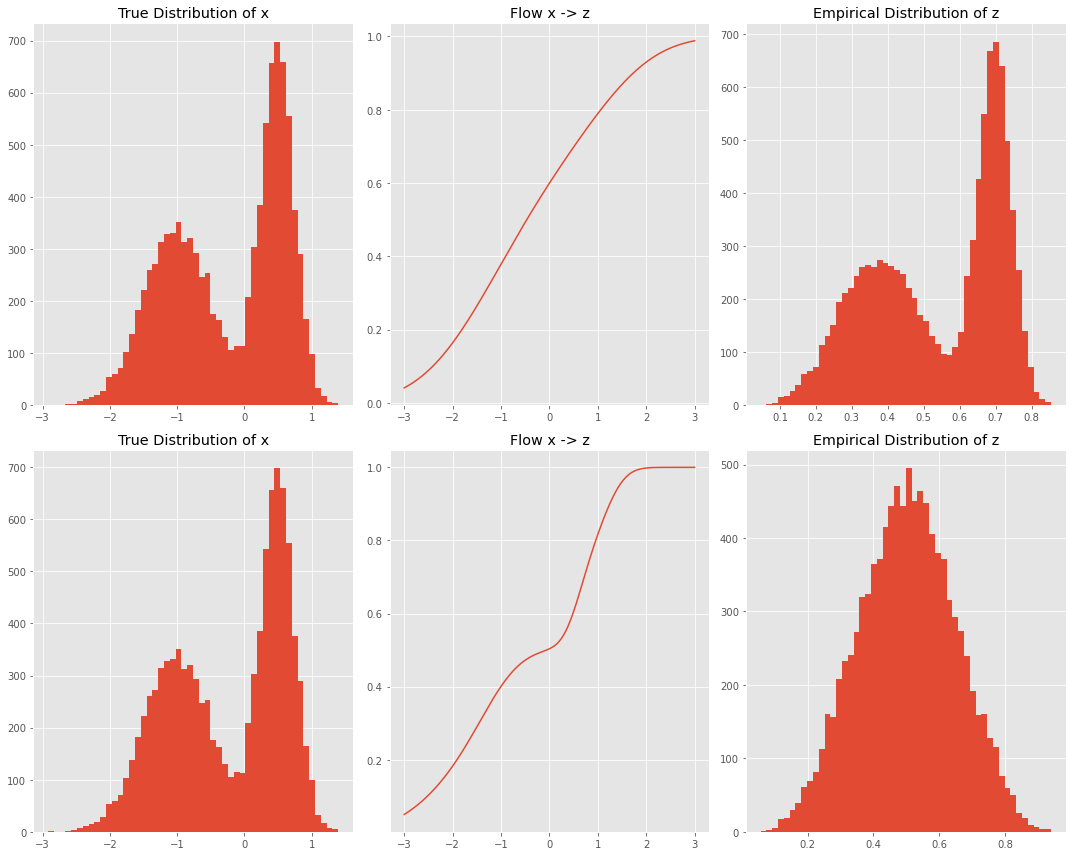

In [13]:

_ = visualize_model_progression(train_dataloader,
                            trained_model=beta_model,
                            untrained_model=beta_model_copy)